In [1]:
import numpy as np
from datascience import *
path_data = 'https://github.com/data-8/textbook/raw/gh-pages/data/'
top1 = Table.read_table(path_data + 'top_movies.csv')
top2 = top1.with_column('Row Index', np.arange(top1.num_rows))
top = top2.move_to_start('Row Index')
top.set_format(make_array(3, 4), NumberFormatter)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),"906,723,418","906,723,400",2015
1,Avatar,Fox,"760,507,625","846,120,800",2009
2,Titanic,Paramount,"658,672,302","1,178,627,900",1997
3,Jurassic World,Universal,"652,270,625","687,728,000",2015
4,Marvel's The Avengers,Buena Vista (Disney),"623,357,910","668,866,600",2012
5,The Dark Knight,Warner Bros.,"534,858,444","647,761,600",2008
6,Star Wars: Episode I - The Phantom Menace,Fox,"474,544,677","785,715,000",1999
7,Star Wars,Fox,"460,998,007","1,549,640,500",1977
8,Avengers: Age of Ultron,Buena Vista (Disney),"459,005,868","465,684,200",2015
9,The Dark Knight Rises,Warner Bros.,"448,139,099","500,961,700",2012


In [2]:
top.take(make_array(3, 18, 100))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,Jurassic World,Universal,"652,270,625","687,728,000",2015
18,Spider-Man,Sony,"403,706,375","604,517,300",2002
100,Gone with the Wind,MGM,"198,676,459","1,757,788,200",1939


In [3]:
top.where('Title', are.containing('Harry Potter'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,"381,011,219","417,512,200",2011
43,Harry Potter and the Sorcerer's Stone,Warner Bros.,"317,575,550","486,442,900",2001
54,Harry Potter and the Half-Blood Prince,Warner Bros.,"301,959,197","352,098,800",2009
59,Harry Potter and the Order of the Phoenix,Warner Bros.,"292,004,738","369,250,200",2007
62,Harry Potter and the Goblet of Fire,Warner Bros.,"290,013,036","393,024,800",2005
69,Harry Potter and the Chamber of Secrets,Warner Bros.,"261,988,482","390,768,100",2002
76,Harry Potter and the Prisoner of Azkaban,Warner Bros.,"249,541,069","349,598,600",2004


In [4]:
"""Choose a random start among rows 0 through 9;
then take every 10th row."""
start = np.random.choice(np.arange(10))
top.take(np.arange(start, top.num_rows, 10))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
2,Titanic,Paramount,"658,672,302","1,178,627,900",1997
12,The Hunger Games: Catching Fire,Lionsgate,"424,668,047","444,697,400",2013
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,"381,011,219","417,512,200",2011
32,American Sniper,Warner Bros.,"350,126,372","374,796,000",2014
42,Iron Man,Paramount,"318,412,101","385,808,100",2008
52,Skyfall,Sony,"304,360,277","329,225,400",2012
62,Harry Potter and the Goblet of Fire,Warner Bros.,"290,013,036","393,024,800",2005
72,Jaws,Universal,"260,000,000","1,114,285,700",1975
82,Twister,Warner Bros.,"241,721,524","475,786,700",1996
92,Ghost,Paramount,"217,631,306","447,747,400",1990


In [5]:
die = Table().with_column('Face', np.arange(1, 7, 1))
die

Face
1
2
3
4
5
6


In [6]:
die.sample(10)

Face
1
2
4
3
2
2
1
4
2
3


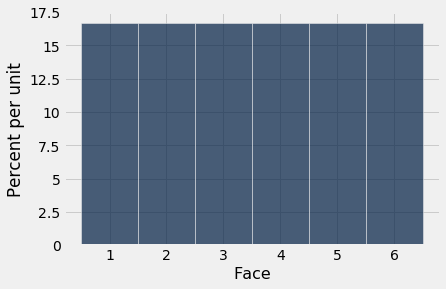

In [7]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
die_bins = np.arange(0.5, 6.6, 1)
die.hist(bins = die_bins)

In [0]:
def empirical_hist_die(n):
    die.sample(n).hist(bins = die_bins)

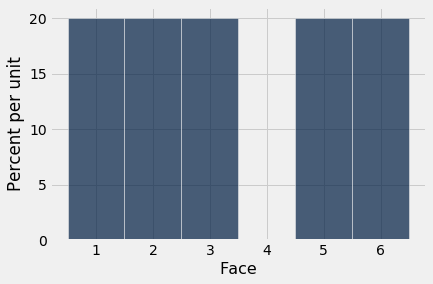

In [9]:
empirical_hist_die(10)

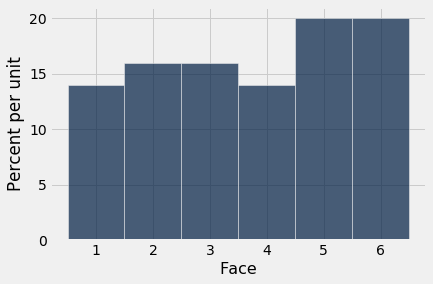

In [10]:
empirical_hist_die(100)

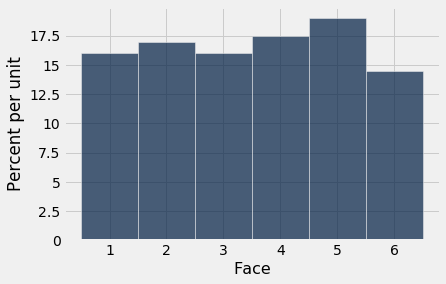

In [11]:
empirical_hist_die(1000)

In [12]:
united = Table.read_table(path_data + 'united_summer2015.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


In [13]:
united.column('Delay').min()

-16

In [14]:
united.column('Delay').max()

580

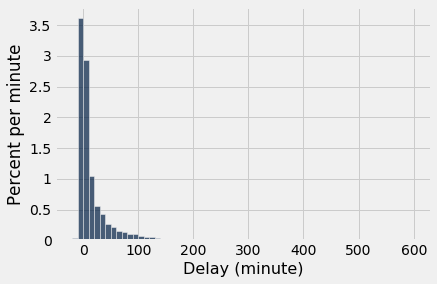

In [15]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
united.hist('Delay', bins = delay_bins, unit = 'minute')

In [16]:
united.where('Delay', are.above(200)).num_rows/united.num_rows

0.008390596745027125

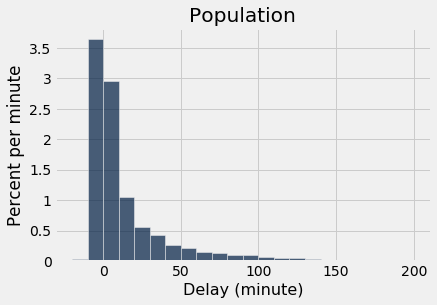

In [17]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Population');

In [18]:
united.where('Delay', are.between(0,
      10)).num_rows/united.num_rows

0.2935985533453888

In [0]:
def empirical_hist_delay(n):
    united.sample(n).hist('Delay', 
    bins = delay_bins, unit = 'minute')

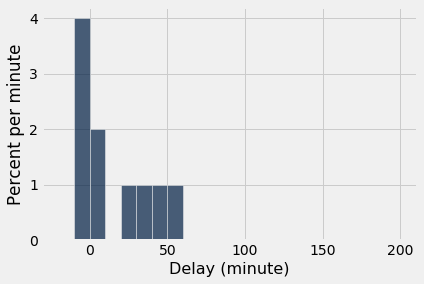

In [20]:
empirical_hist_delay(10)

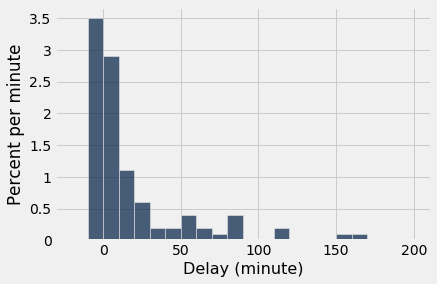

In [21]:
empirical_hist_delay(100)

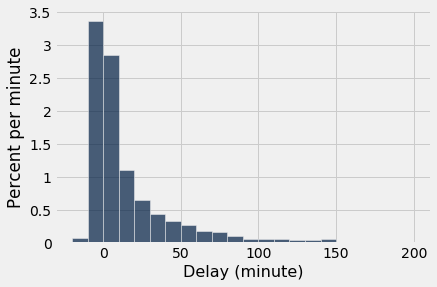

In [22]:
empirical_hist_delay(1000)

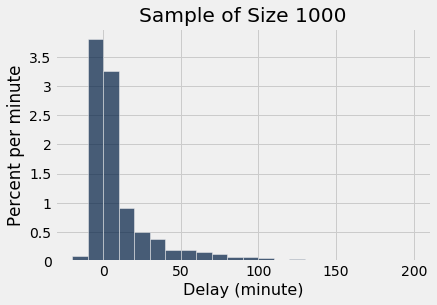

In [23]:
sample_1000 = united.sample(1000)
sample_1000.hist('Delay', bins = delay_bins, unit = 'minute')
plots.title('Sample of Size 1000');

In [24]:
np.median(united.column('Delay'))

2.0

In [25]:
united.where('Delay', are.below_or_equal_to(2)).num_rows / united.num_rows

0.5018444846292948

In [26]:
united.where('Delay', are.equal_to(2)).num_rows

480

In [27]:
np.median(sample_1000.column('Delay'))

1.0

In [28]:
np.median(united.sample(1000).column('Delay'))

2.5

In [0]:
def random_sample_median():
    return np.median(united.sample(1000).column('Delay'))

In [0]:
medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

In [31]:
simulated_medians = Table().with_column('Sample Median', medians)
simulated_medians

Sample Median
2
2
2
2
3
2
2
3
2
1


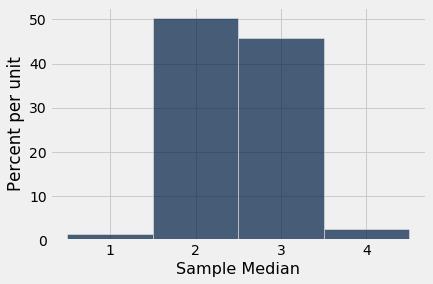

In [32]:
simulated_medians.hist(bins=np.arange(0.5, 5, 1))